<a href="https://colab.research.google.com/github/miuceo/ML_intro/blob/main/california_housing_data_observation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [ ]:
df = pd.read_csv("https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.shape

(20640, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


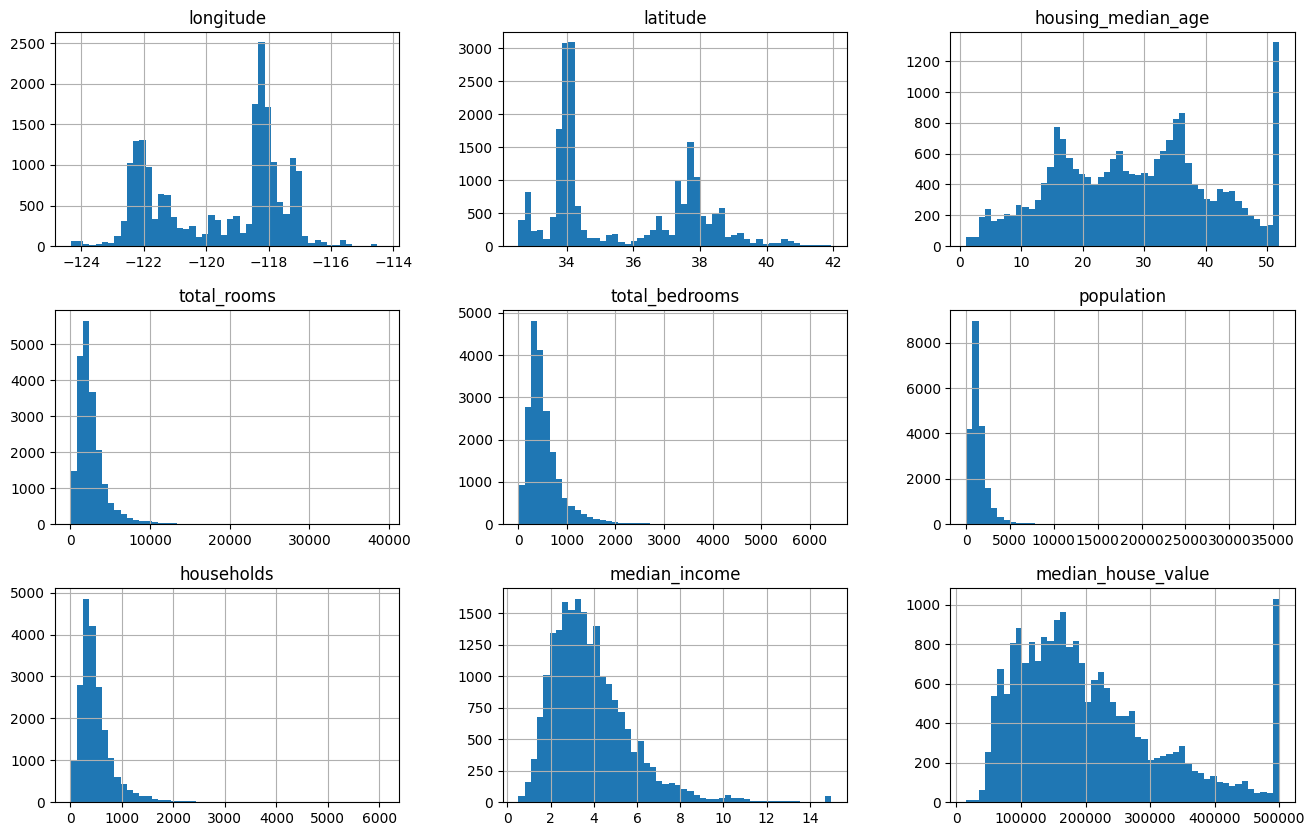

In [ ]:
df.hist(bins = 50, figsize = (16, 10))
plt.show()

**Train and test set 80/20, 60/40**

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=35)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1380,-122.09,38.00,6.0,10191.0,1882.0,4377.0,1789.0,5.2015,204200.0,NEAR BAY
12294,-116.93,33.93,13.0,7804.0,1594.0,3297.0,1469.0,2.0549,95600.0,INLAND
7387,-118.25,33.97,37.0,794.0,210.0,814.0,213.0,2.2917,112000.0,<1H OCEAN
14454,-117.27,32.83,39.0,1877.0,426.0,805.0,409.0,3.8750,410000.0,NEAR OCEAN
2927,-119.01,35.36,24.0,1941.0,484.0,1277.0,435.0,1.0560,51600.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
19391,-120.85,37.78,25.0,421.0,NaN,303.0,106.0,2.2679,71300.0,INLAND
15393,-116.90,33.22,11.0,4132.0,773.0,2012.0,703.0,3.1906,234500.0,<1H OCEAN
9143,-117.96,34.48,32.0,1896.0,342.0,806.0,299.0,4.5769,159400.0,INLAND
17679,-121.84,37.32,22.0,3015.0,581.0,2491.0,530.0,4.3419,176300.0,<1H OCEAN


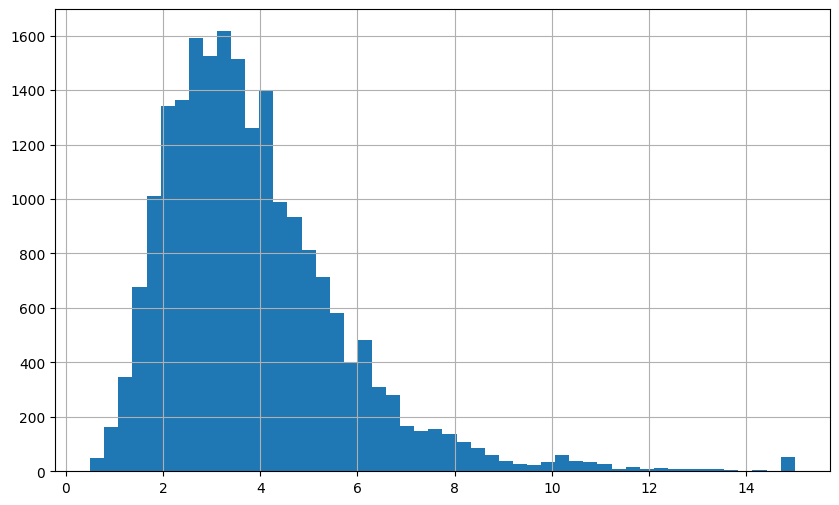

In [ ]:
df['median_income'].hist(bins=50, figsize=(10,6))
plt.show()

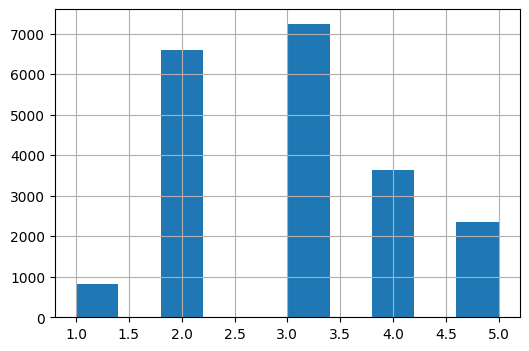

In [ ]:
df['income_cat'] = pd.cut(df['median_income'], bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf], labels = [1, 2, 3, 4 ,5])
df['income_cat'].hist(figsize=(6, 4))
plt.show()

**For balanced data splitting**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=50)
for train_index, test_index in stratified_split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [ ]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
15513,-117.03,33.18,17.0,5391.0,886.0,2732.0,830.0,5.1771,212800.0,<1H OCEAN,4
10111,-117.94,33.94,25.0,3250.0,546.0,1452.0,501.0,5.1084,303800.0,<1H OCEAN,4
10002,-121.07,39.04,9.0,2374.0,372.0,884.0,333.0,4.5042,206400.0,INLAND,4
16700,-120.61,35.10,17.0,2799.0,637.0,2015.0,592.0,3.0536,143600.0,<1H OCEAN,3
19958,-119.32,36.21,29.0,1220.0,232.0,619.0,246.0,3.3125,78300.0,INLAND,3


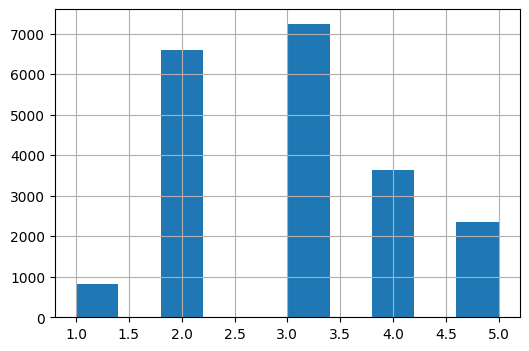

In [ ]:
df['income_cat'].hist(figsize=(6, 4))
plt.show()

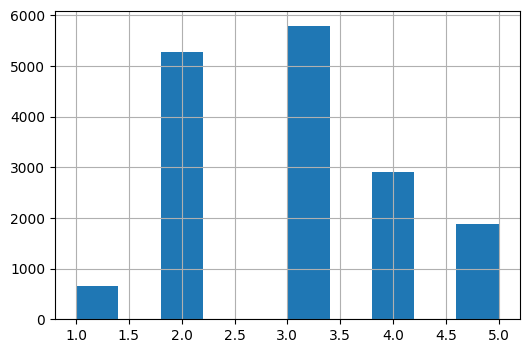

In [ ]:
strat_train_set['income_cat'].hist(figsize=(6, 4))
plt.show()

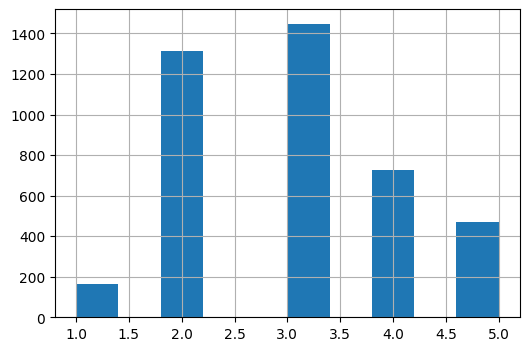

In [ ]:
strat_test_set['income_cat'].hist(figsize=(6, 4))
plt.show()

In [ ]:
df = strat_train_set.drop('income_cat', axis = 1)
strat_test_set.drop('income_cat', axis = 1, inplace = True)

In [ ]:
strat_test_set.drop('income_cat', axis = 1, inplace=True)
strat_train_set.drop('income_cat', axis = 1, inplace=True)

In [ ]:
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15513,-117.03,33.18,17.0,5391.0,886.0,2732.0,830.0,5.1771,212800.0,<1H OCEAN
10111,-117.94,33.94,25.0,3250.0,546.0,1452.0,501.0,5.1084,303800.0,<1H OCEAN
10002,-121.07,39.04,9.0,2374.0,372.0,884.0,333.0,4.5042,206400.0,INLAND
16700,-120.61,35.10,17.0,2799.0,637.0,2015.0,592.0,3.0536,143600.0,<1H OCEAN
19958,-119.32,36.21,29.0,1220.0,232.0,619.0,246.0,3.3125,78300.0,INLAND


<img src = "https://geology.com/state-map/maps/california-county-map.gif">

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


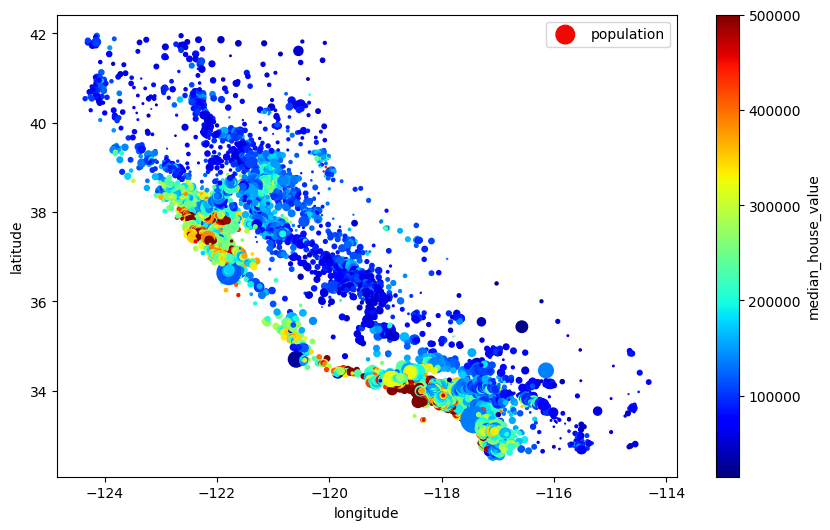

In [ ]:
df.plot(
    kind='scatter',
    x = 'longitude',
    y = 'latitude',
    s = df['population']/100,  # the size of each dot in the graph that is related to the population of it
    label = 'population',
    c = 'median_house_value', # colors related to the median house value in each province
    cmap='jet', # the color map
    colorbar = True, # the color bar
    figsize = (10, 6)
)
plt.show()

In [ ]:
df.corrwith(df['median_house_value'], numeric_only=True).sort_values(ascending=False)

,0
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


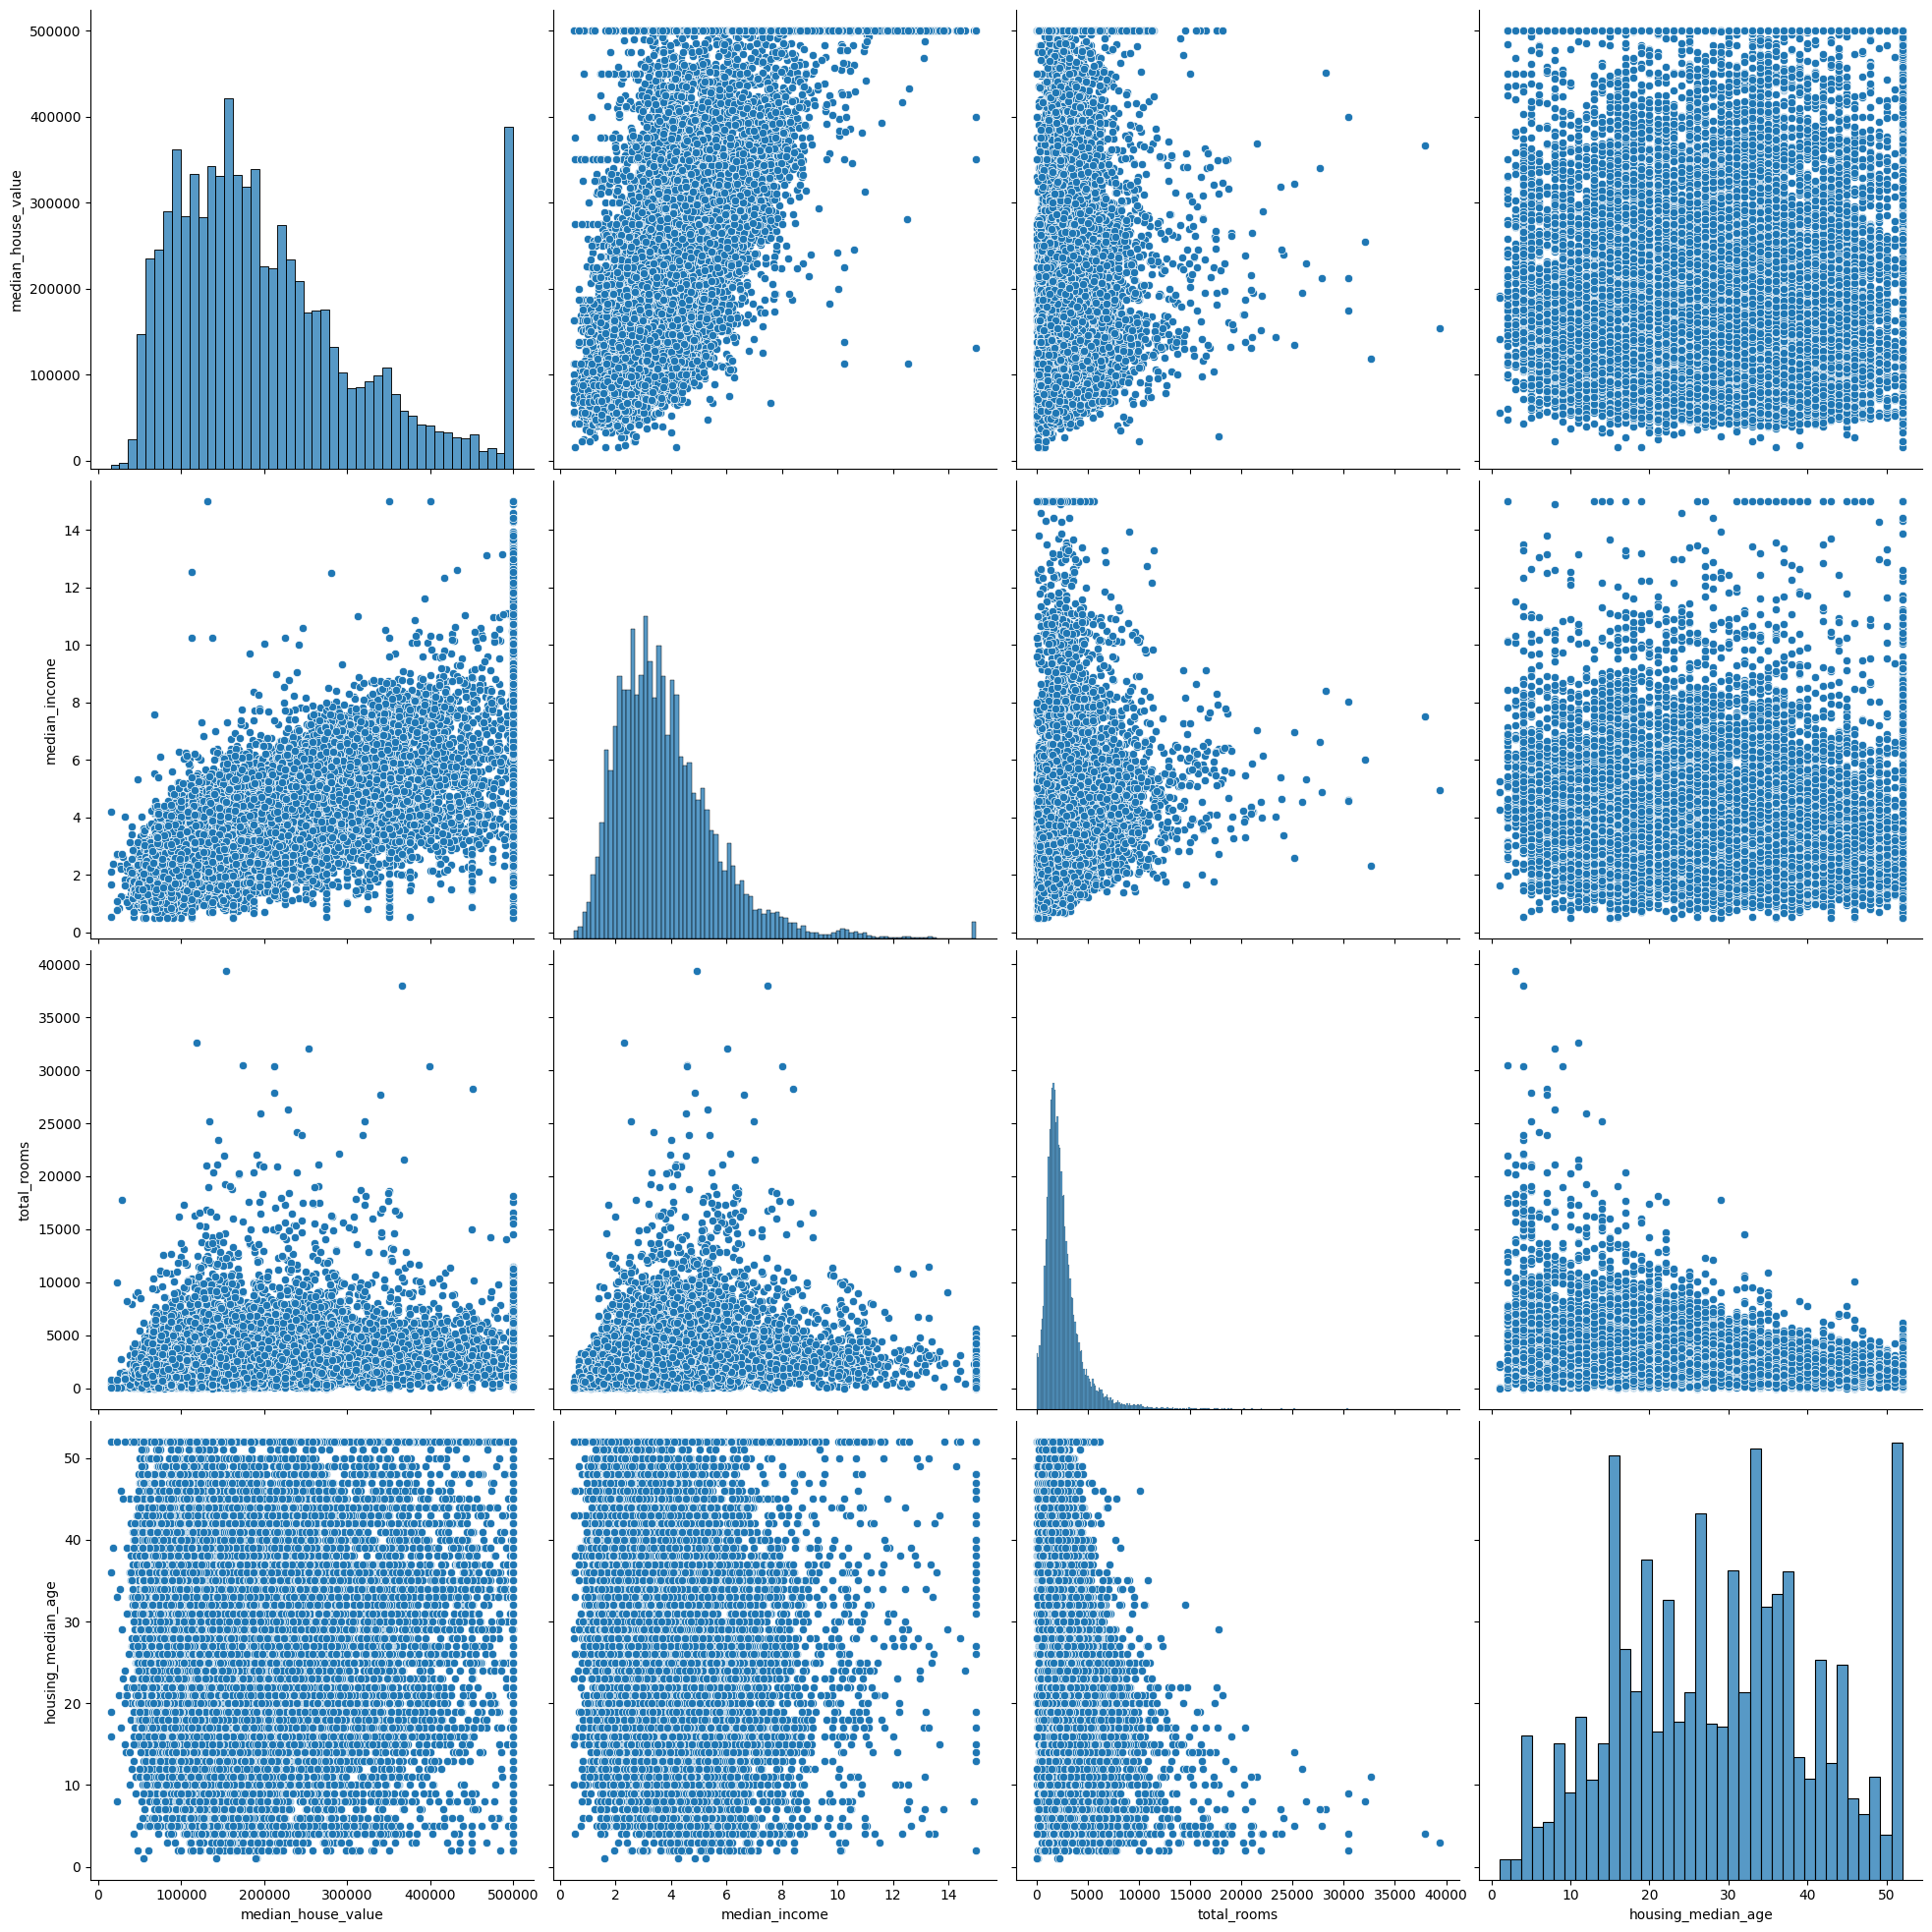

In [ ]:
cols = ['median_house_value','median_income', 'total_rooms', 'housing_median_age']
sns.pairplot(df[cols], height=5)
plt.show()

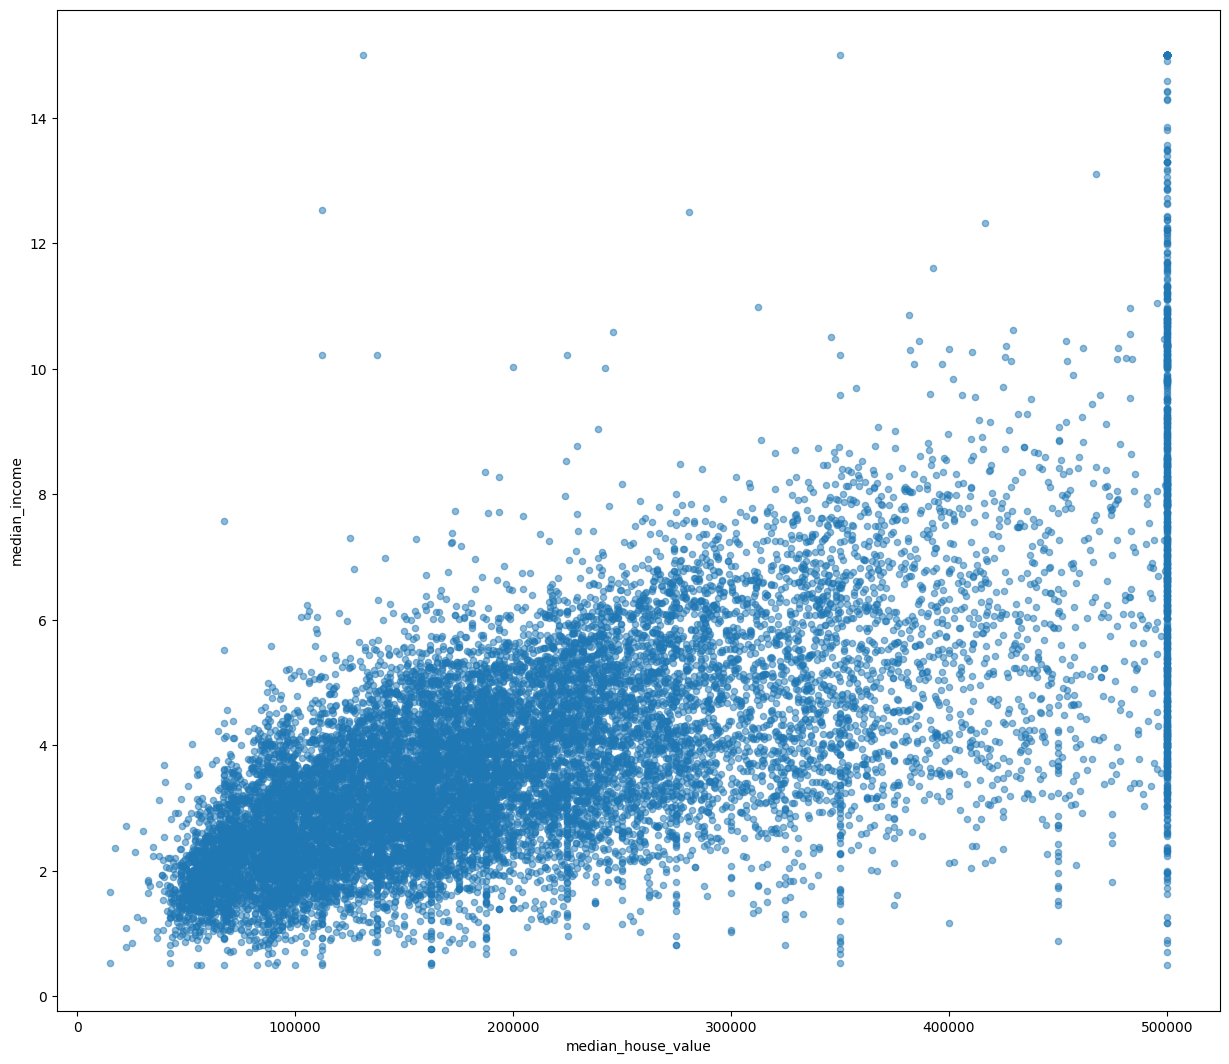

In [ ]:
housing.plot(kind = 'scatter', x = 'median_house_value', y = 'median_income', alpha = 0.5, figsize= (15, 13))
plt.show()

new params

In [ ]:
housing['per_household_room'] = df['total_rooms'] / df['households']
housing['per_bedroom_room'] = df['total_bedrooms'] / df['total_rooms']
housing['population_per_household'] = df['population'] / df['households']
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,per_household_room,per_bedroom_room,population_per_household
15513,-117.03,33.18,17.0,5391.0,886.0,2732.0,830.0,5.1771,212800.0,<1H OCEAN,6.495181,0.164348,3.291566
10111,-117.94,33.94,25.0,3250.0,546.0,1452.0,501.0,5.1084,303800.0,<1H OCEAN,6.487026,0.168000,2.898204
10002,-121.07,39.04,9.0,2374.0,372.0,884.0,333.0,4.5042,206400.0,INLAND,7.129129,0.156698,2.654655
16700,-120.61,35.10,17.0,2799.0,637.0,2015.0,592.0,3.0536,143600.0,<1H OCEAN,4.728041,0.227581,3.403716
19958,-119.32,36.21,29.0,1220.0,232.0,619.0,246.0,3.3125,78300.0,INLAND,4.959350,0.190164,2.516260


In [ ]:
housing.corrwith(housing['median_house_value'], numeric_only=True).sort_values(ascending=False)

,0
median_house_value,1.000000
median_income,0.686977
per_household_room,0.151376
total_rooms,0.137150
housing_median_age,0.103604
households,0.066519
total_bedrooms,0.052712
population,-0.024756
population_per_household,-0.027228
longitude,-0.048672
